In [4]:
import torch
import numpy as np
import dimensionalityreductionmethods as drm

In [5]:
def generate_linear_data(n_samples=100, input_dim=3, output_dim=2, add_bias=True):
    x = np.random.rand(n_samples, input_dim)
    A = np.random.rand(output_dim, input_dim)
    b = np.random.rand(output_dim) if add_bias else np.zeros(output_dim)
    y = x @ A.T + b

    return x, y


def add_noise(base_data, factor=0.75):
    """
    Adds noise based on the overall variance of all elements in base_data.

    Parameters:
        base_data: A NumPy array or PyTorch tensor of data where noise needs to be added.
        factor (float): The factor by which the noise is multiplied by, default is 1.

    Returns:
        base_data with added noise.
    """
    if isinstance(base_data, np.ndarray):
        base_data = torch.tensor(base_data, dtype=torch.float32)

    overall_variance = torch.var(base_data, unbiased=False)
    overall_noise_std = torch.sqrt(overall_variance)

    noise = torch.randn_like(base_data) * overall_noise_std * factor
    noisy_data = base_data + noise

    if isinstance(base_data, np.ndarray):
        return noisy_data.numpy()

    return noisy_data

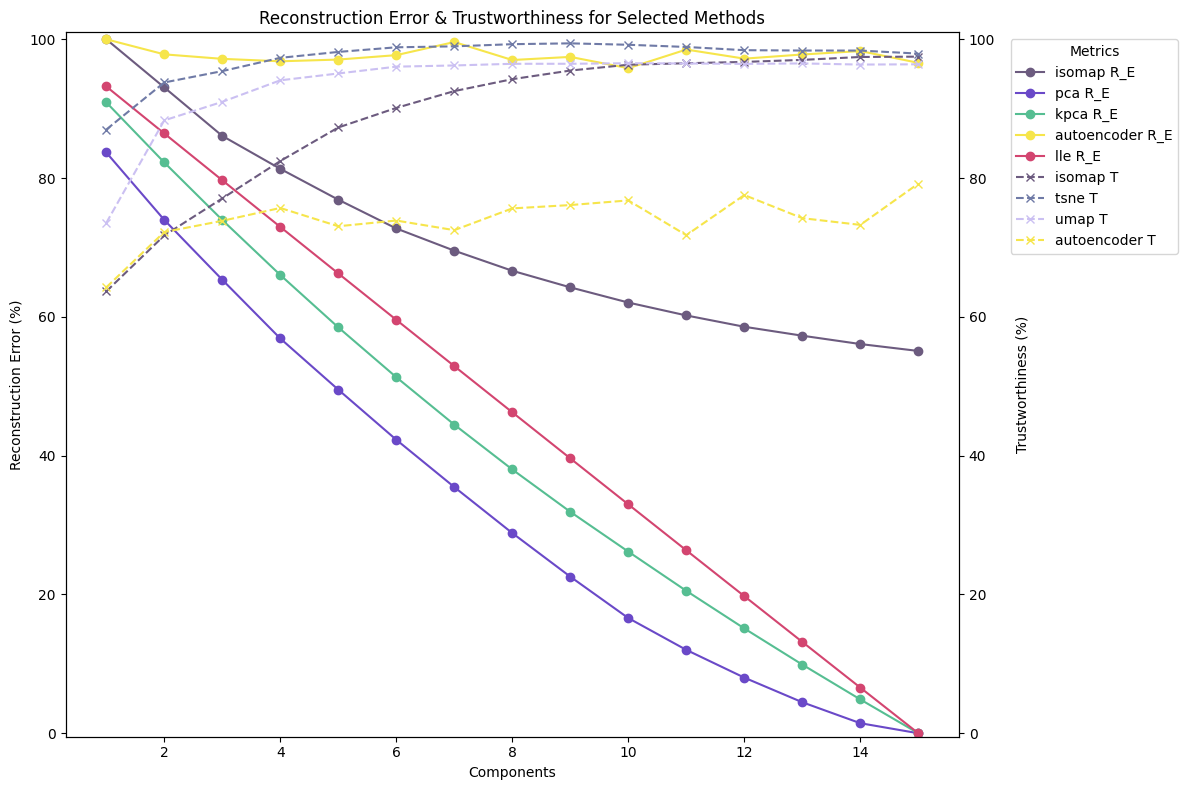

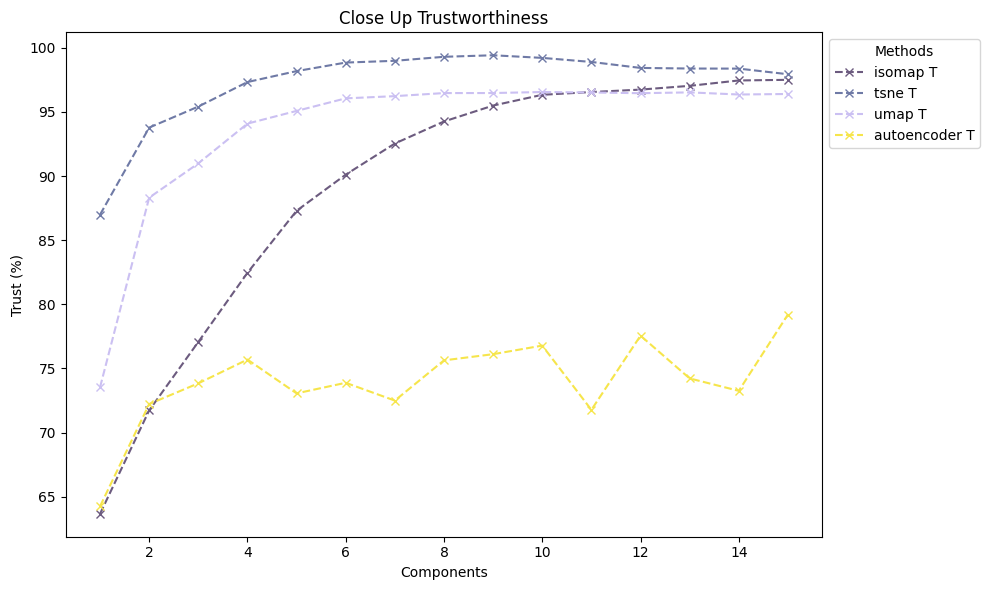

| Method      | Opt. Trustworthiness Components   | Max Trustworthiness   | Opt. Error Components   | Min R. Error           |         time |
|-------------|-----------------------------------|-----------------------|-------------------------|------------------------|--------------|
| isomap      | 15                                | 97.49821138211382     | 15                      | 55.087012154238316     |   1.87496    |
| pca         | -                                 | -                     | 15                      | -2.220446049250313e-14 |   0.00200105 |
| tsne        | 9                                 | 99.41341463414635     | -                       | -                      | 117.915      |
| umap        | 10                                | 96.54739837398374     | -                       | -                      |  20.048      |
| kpca        | -                                 | -                     | 15                      | 0.0                    |   0.763613   |
| auto

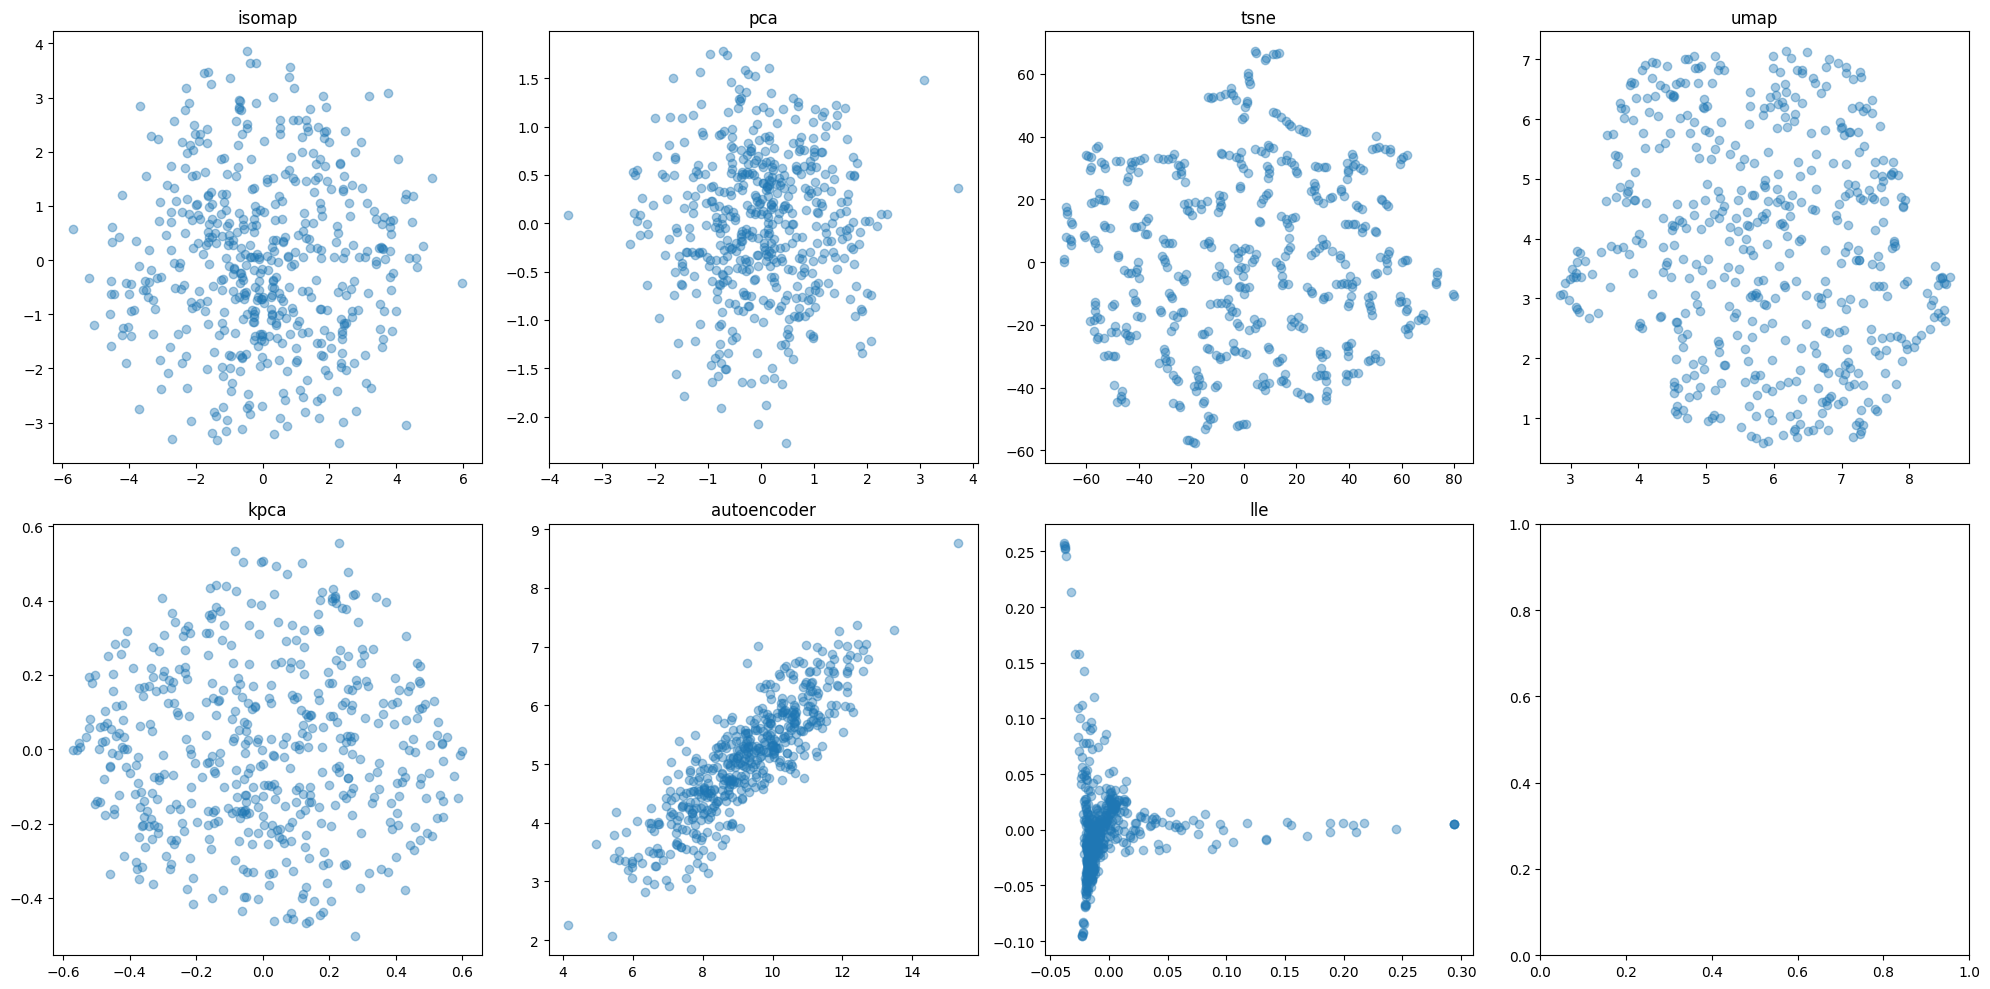

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


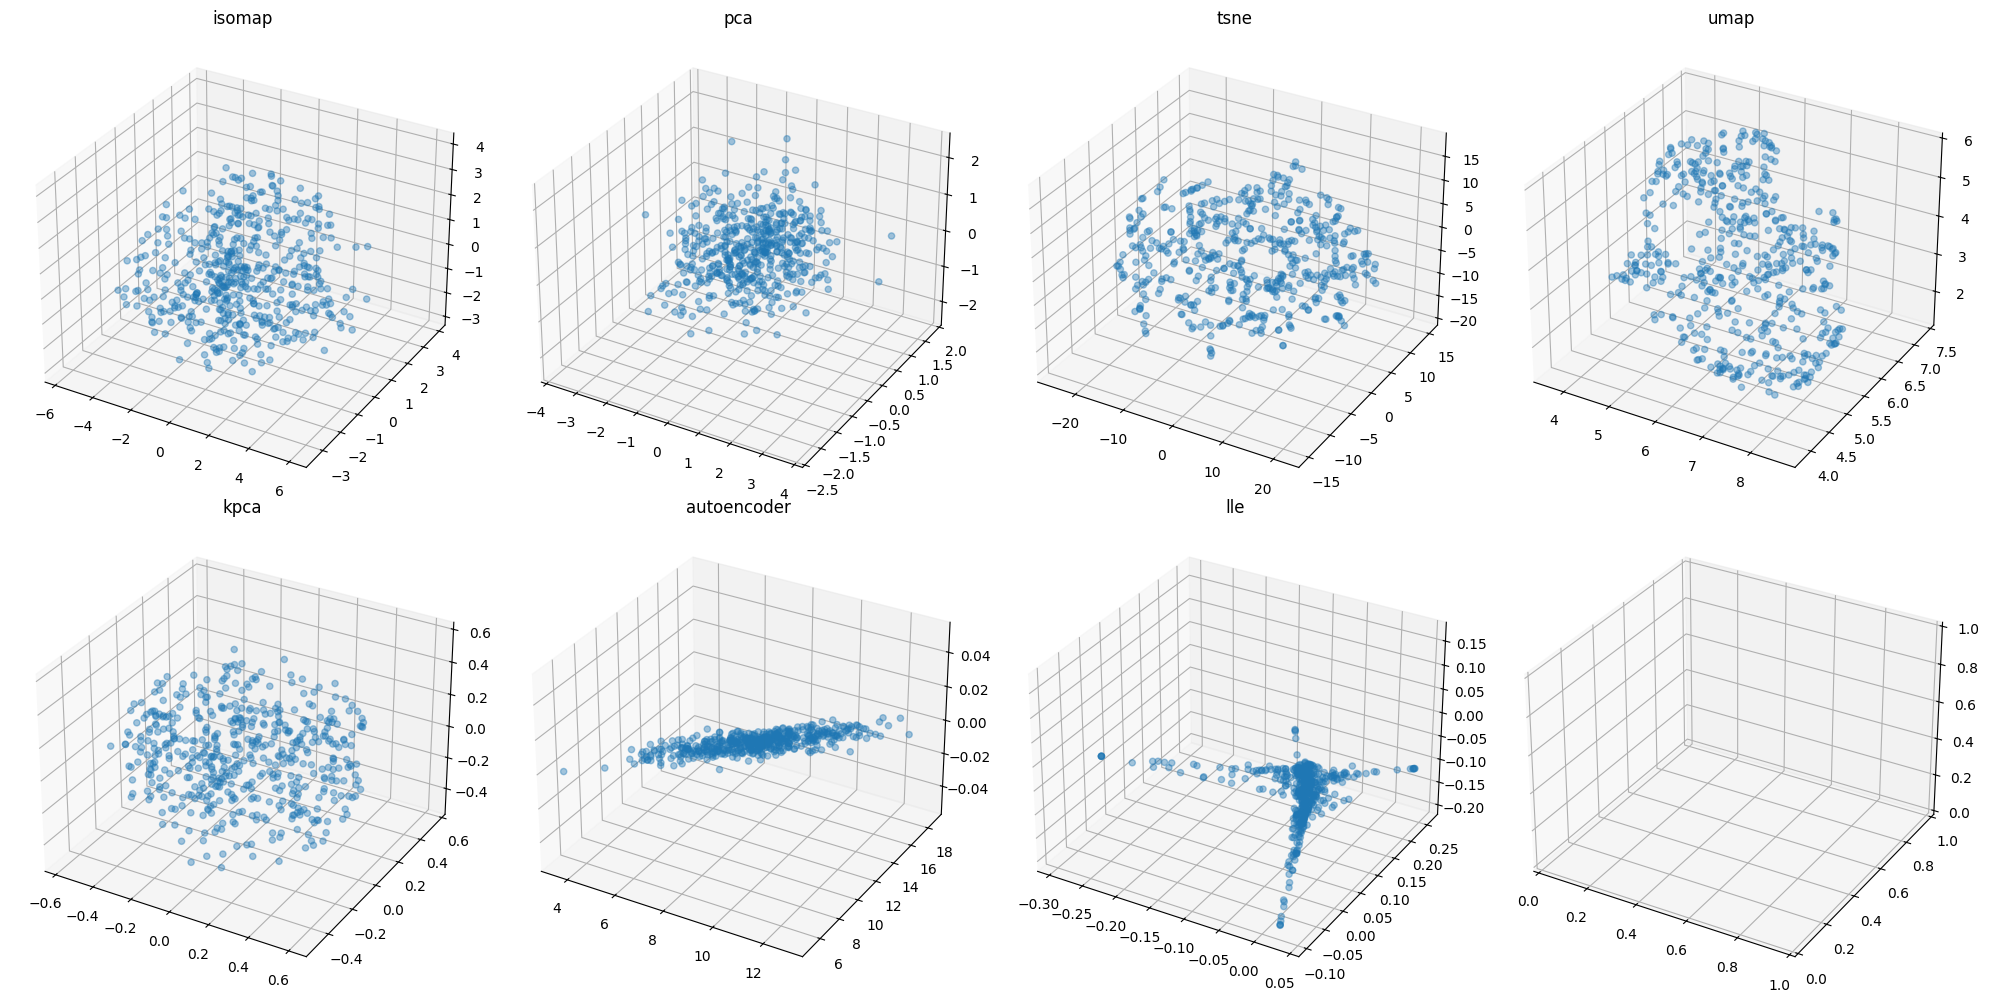

In [ ]:
x, y = generate_linear_data(n_samples=500, input_dim=10, output_dim=5)

y = add_noise(y)
combined_data = np.hstack((x, y))

drh = drm.DimensionalityReductionHandler(combined_data)
drh.analyze_dimensionality_reduction(
    [
        "isomap",
        "PCA",
        "Tsne",
        "Umap",
        "kpca",
        "autoencoder",
        "lle",
    ]
)
drh.plot_results()
drh.table()
drh.visualization()
drh.visualization(plot_in_3d=True)